# Final Report

In [1]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(leaps)
library(broom)
library(car)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [21]:
sleep_data <- read.csv("Sleep_Efficiency.csv")
head(sleep_data)

,ID,Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0,0,Yes,3
2,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0,3,Yes,3
3,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3
4,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50,5,Yes,1
5,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,3
6,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,NA,0,No,1


In [22]:
clean_data <- sleep_data %>%
              mutate(SleepEfficiency = Sleep.efficiency,
                     CeffeineConsumption = Caffeine.consumption,
                     AlcoholConsumption = Alcohol.consumption, 
                     SmokingStatus = Smoking.status,
                     ExerciseFrequency = Exercise.frequency) %>%
              select(SleepEfficiency,CeffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency) %>%
              mutate(SmokingStatus= as.factor(SmokingStatus))
              
head(clean_data)

,SleepEfficiency,CeffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,0.88,0,0,Yes,3
2,0.66,0,3,Yes,3
3,0.89,0,0,No,3
4,0.51,50,5,Yes,1
5,0.76,0,3,No,3
6,0.90,NA,0,No,1


In [23]:
anyNA(clean_data)
sum(is.na(clean_data))
sum(is.na(clean_data))/nrow(clean_data)

[1] TRUE

[1] 45

[1] 0.09955752

In [24]:
# Replace missing values with mean value for CeffeineConsumption
caffeine_mean <- mean(clean_data$CeffeineConsumption, na.rm = TRUE)
clean_data$CeffeineConsumption[is.na(clean_data$CeffeineConsumption)] <- caffeine_mean

# Replace missing values with mean value for AlcoholConsumption
alcohol_mean <- mean(clean_data$AlcoholConsumption, na.rm = TRUE)
clean_data$AlcoholConsumption[is.na(clean_data$AlcoholConsumption)] <- alcohol_mean

# Replace missing values with mean value for ExerciseFrequency
exercise_mean <- mean(clean_data$ExerciseFrequency, na.rm = TRUE)
clean_data$ExerciseFrequency[is.na(clean_data$ExerciseFrequency)] <- exercise_mean

anyNA(clean_data)

[1] FALSE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


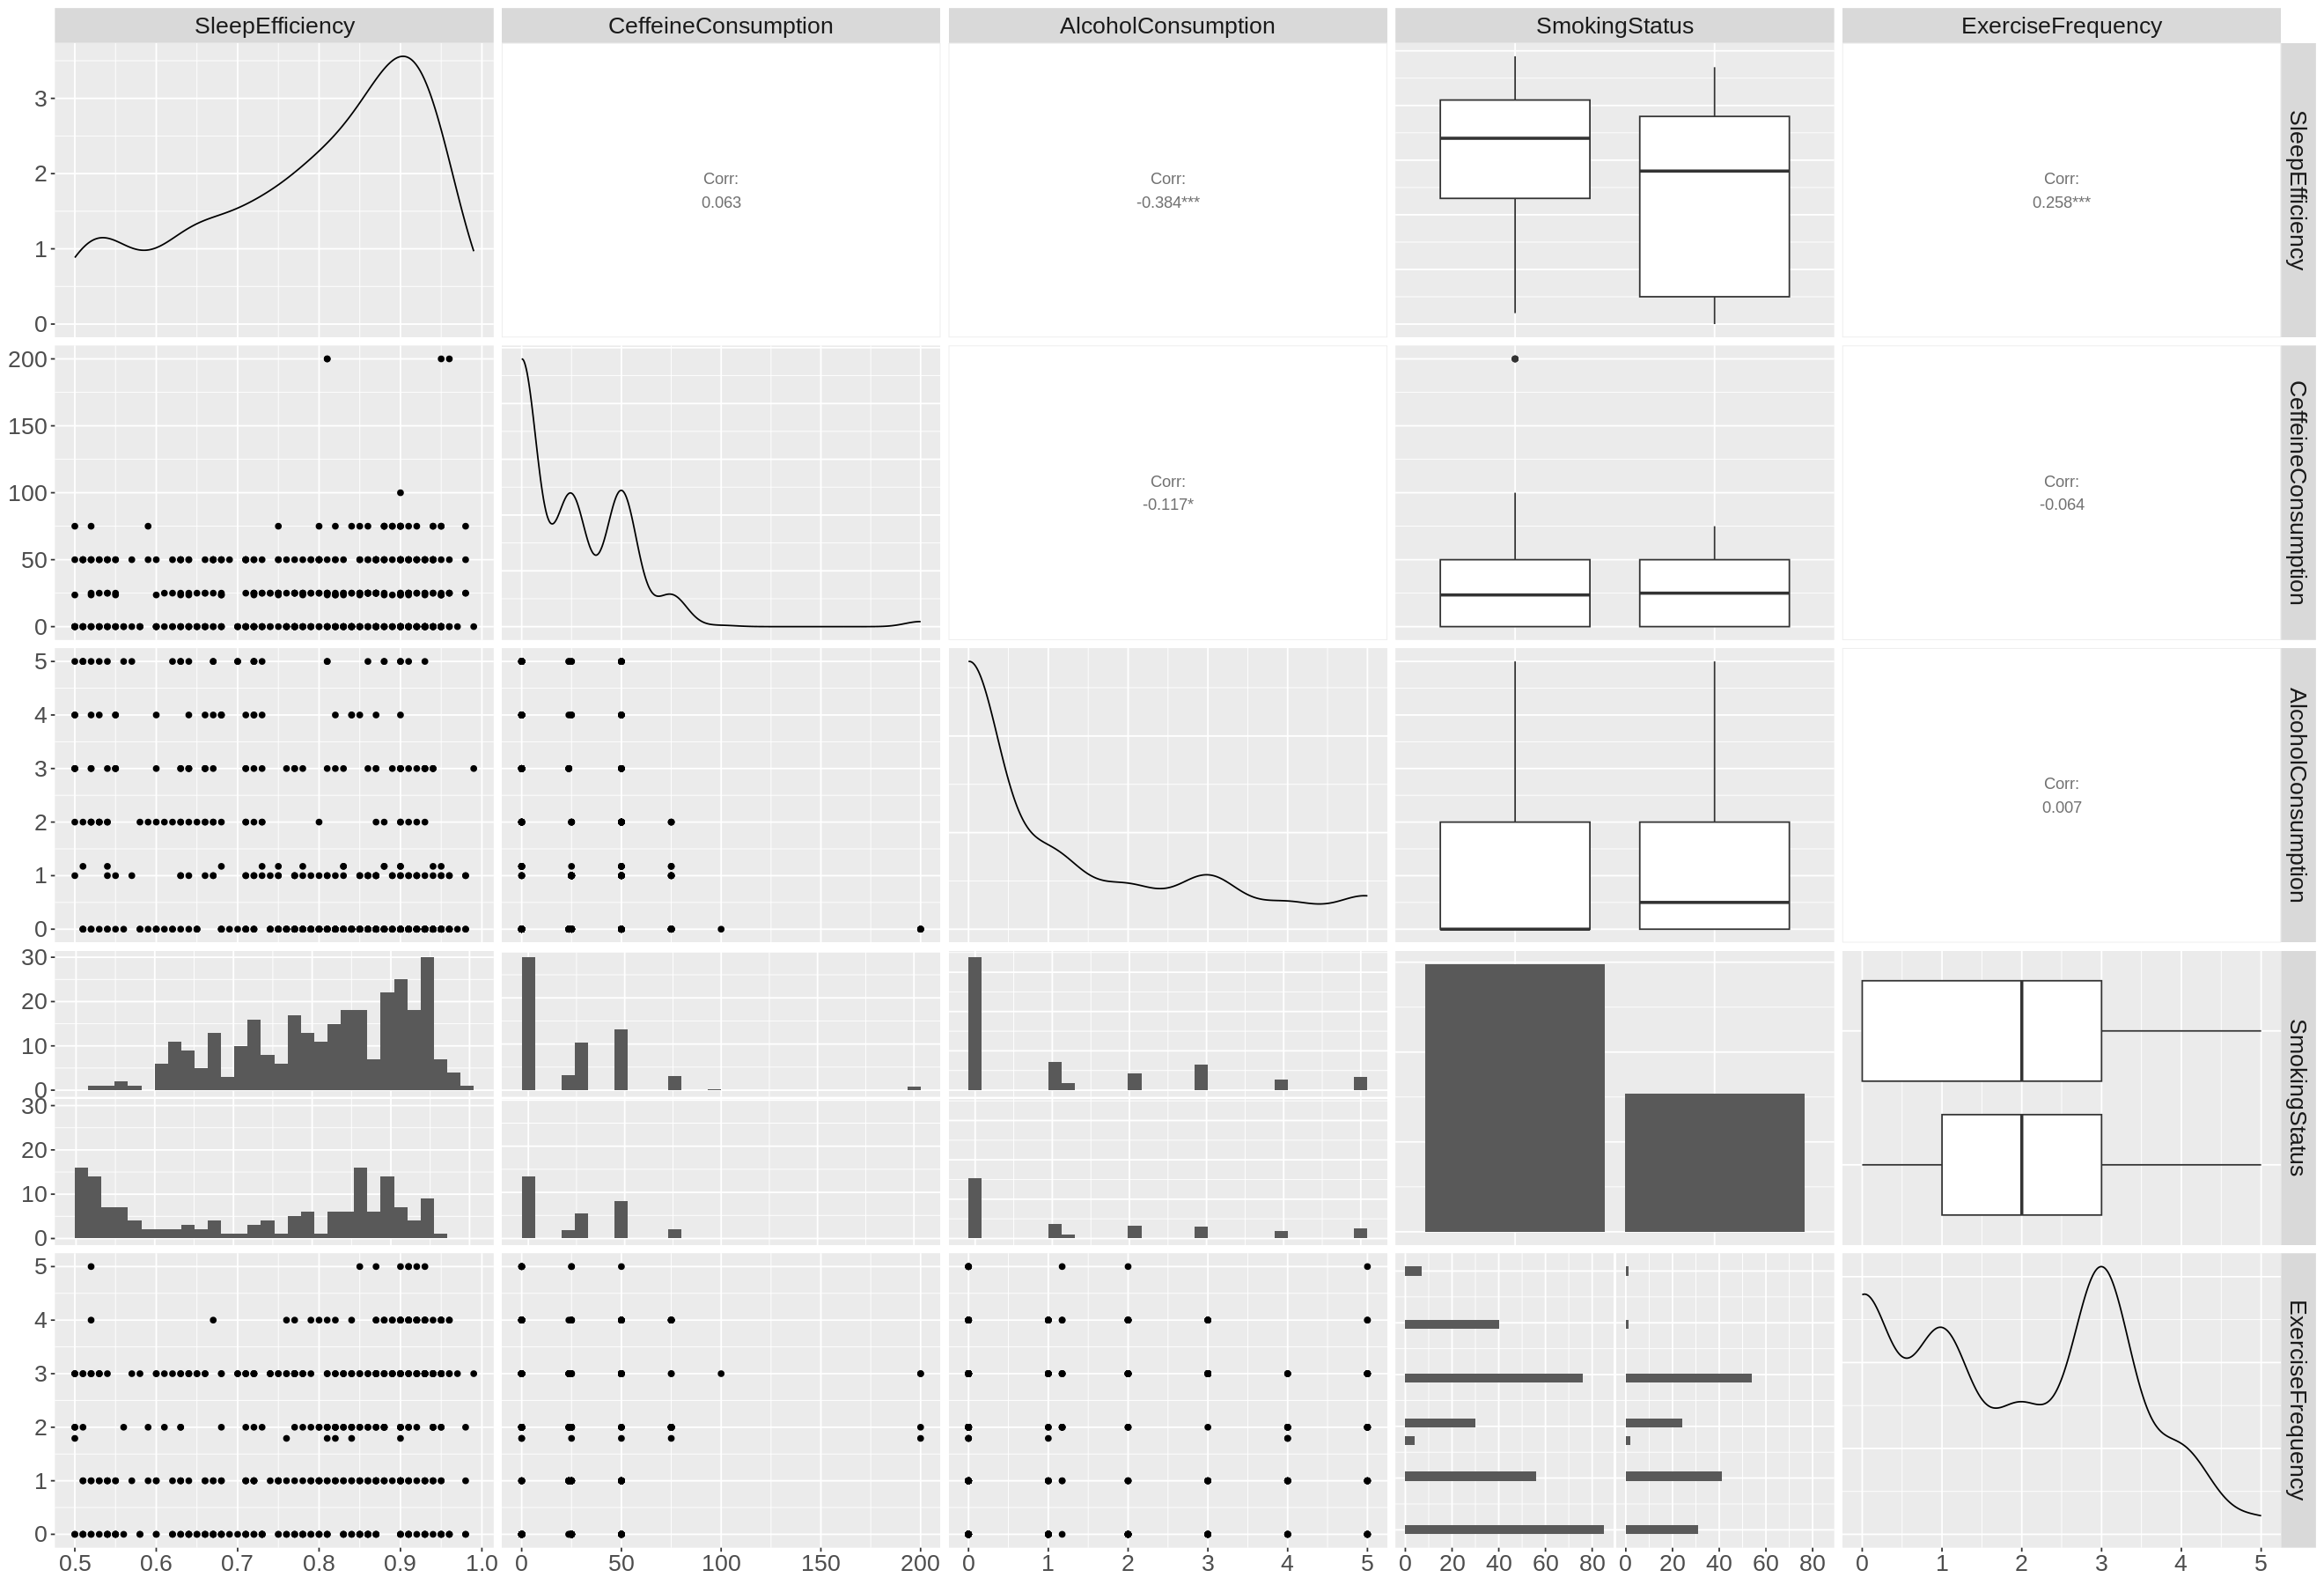

In [25]:
options(repr.plot.width = 22, repr.plot.height = 15)

pairs_plot <- clean_data %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 20),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
pairs_plot

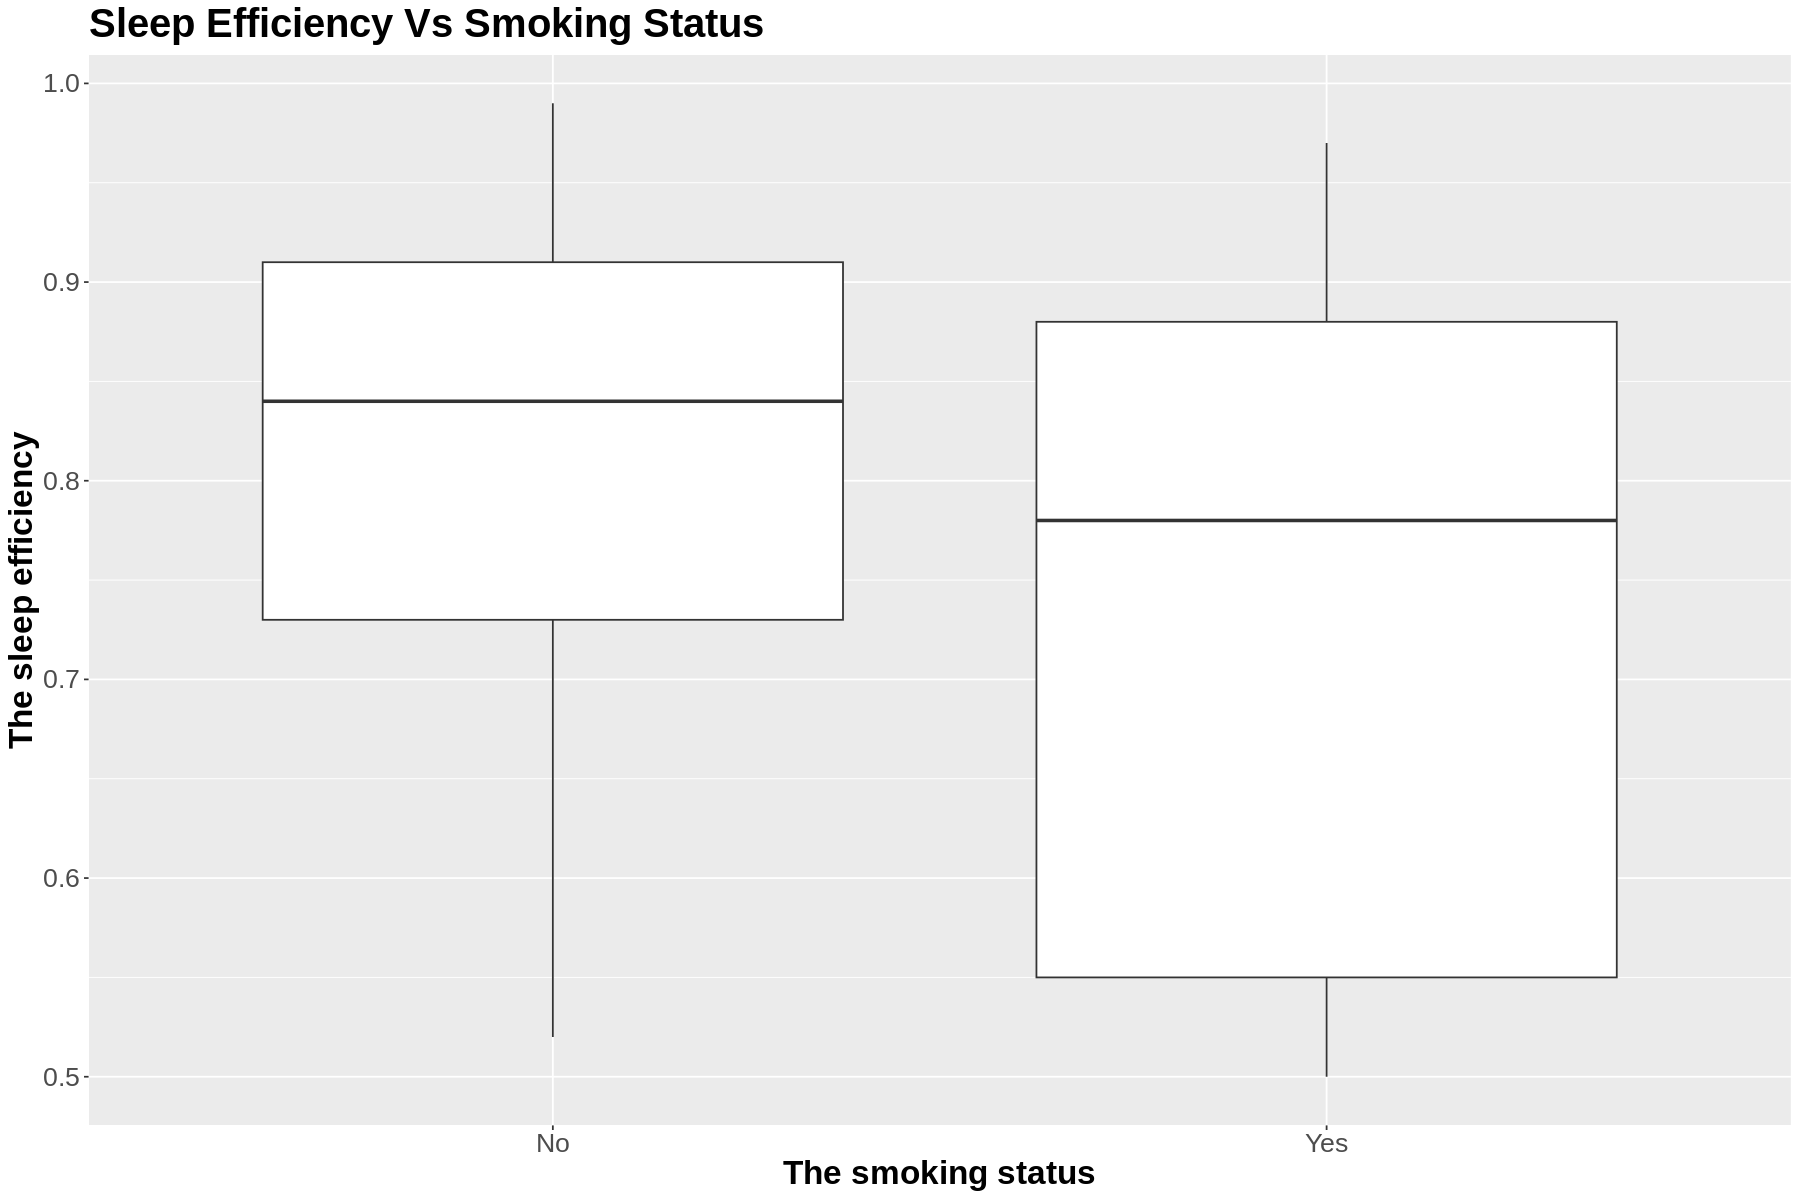

In [26]:
options(repr.plot.width = 15, repr.plot.height = 10)
plot_CC_SE <- clean_data %>%
              ggplot(aes(x = SmokingStatus, y = SleepEfficiency)) +
              geom_boxplot() +
              xlab("The smoking status") +
              ylab("The sleep efficiency") +
              ggtitle("Sleep Efficiency Vs Smoking Status") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )
plot_CC_SE

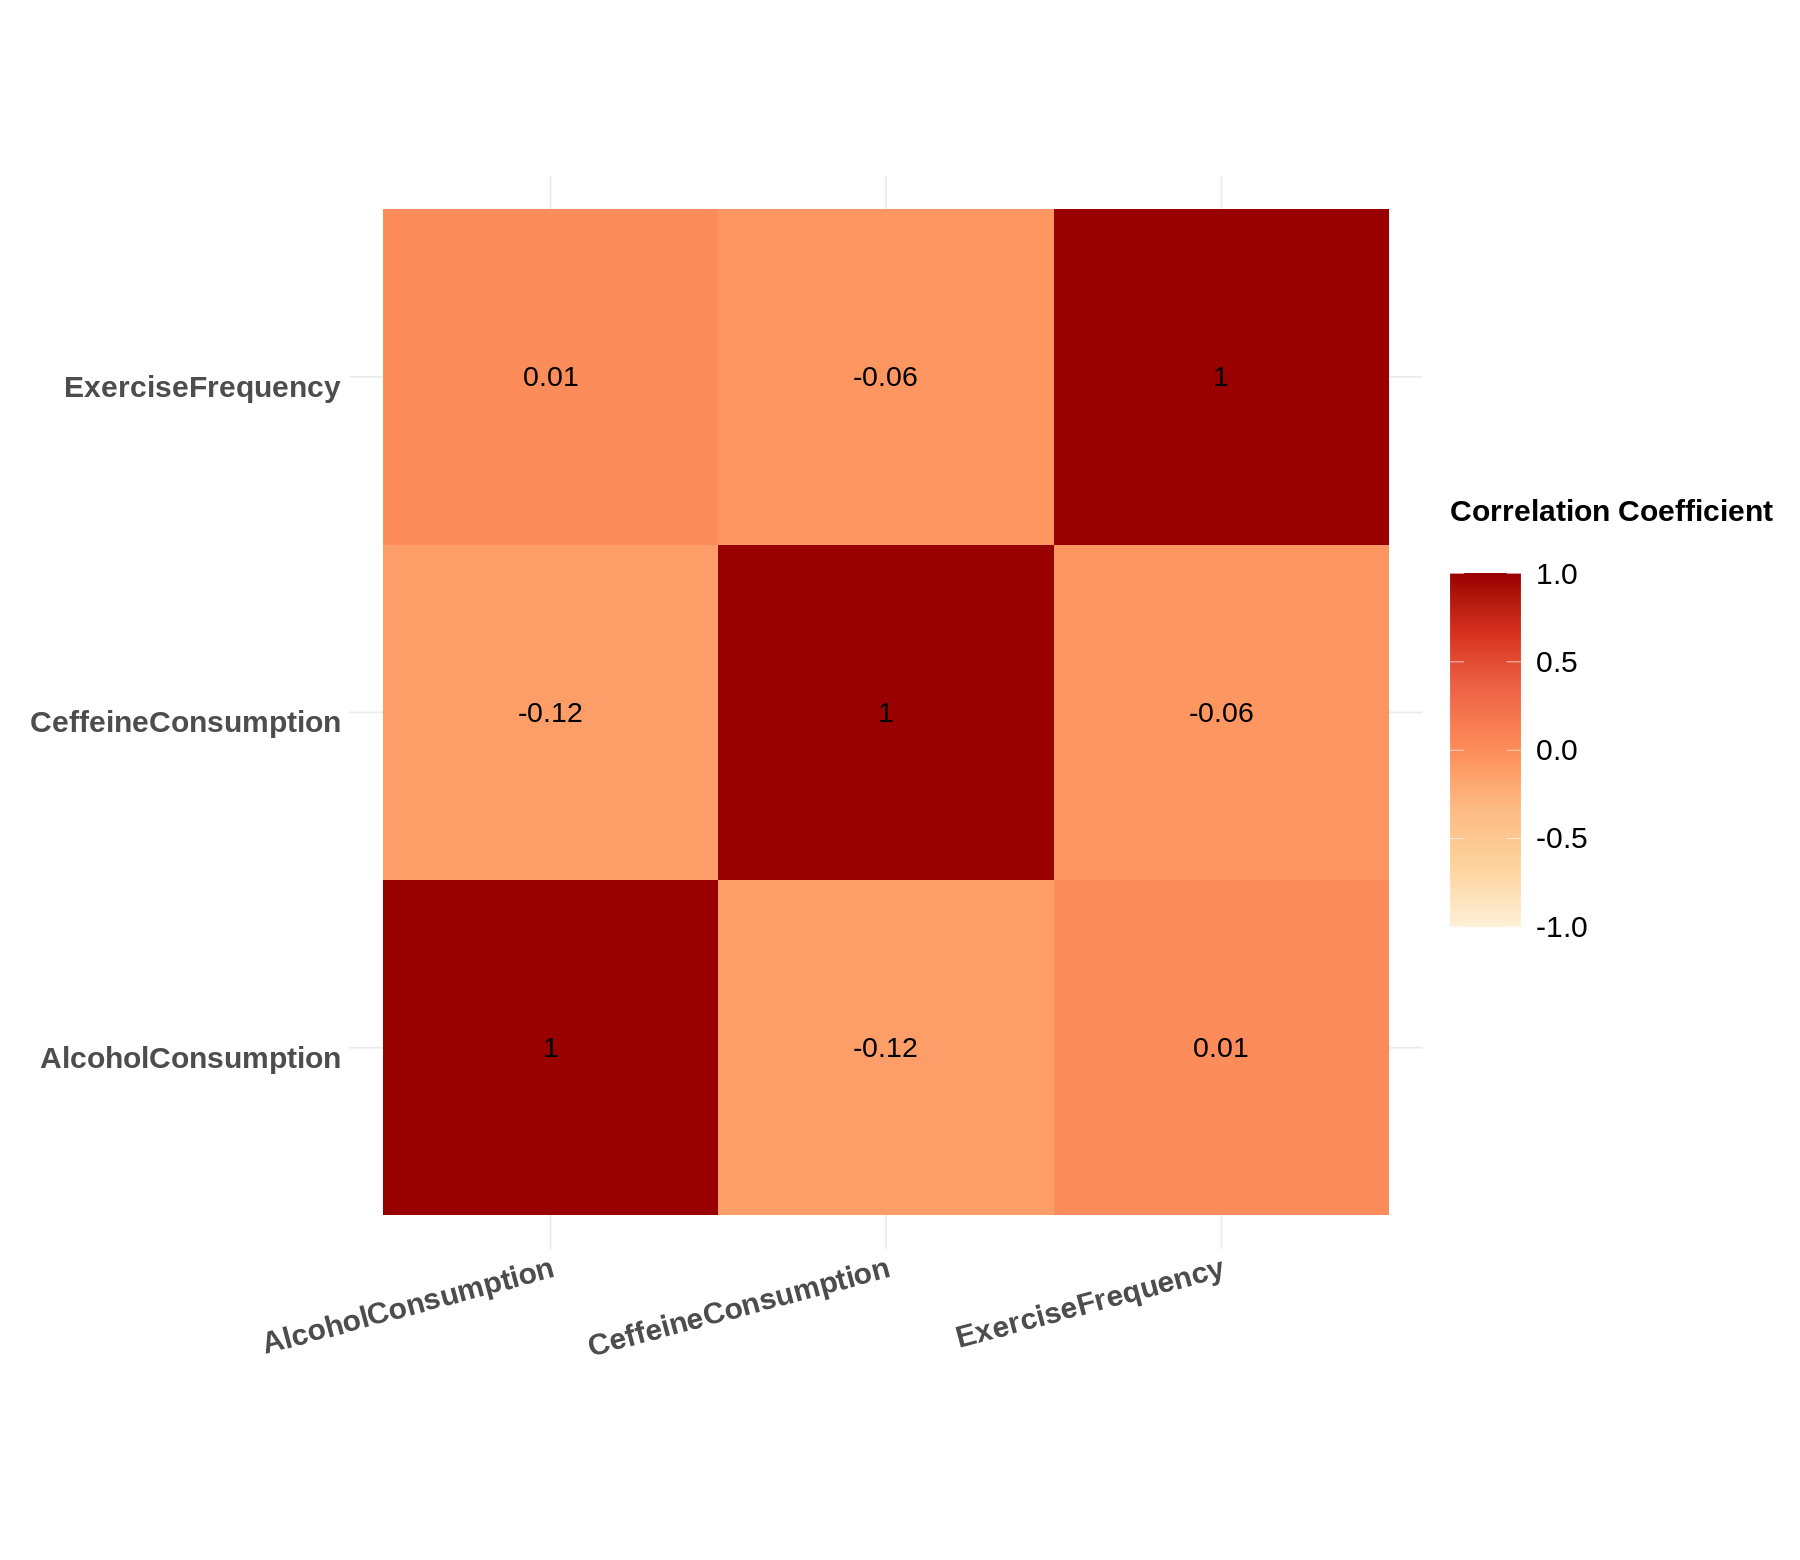

In [27]:
options(repr.plot.width = 15, repr.plot.height = 13)
corr_matrix <- clean_data %>%
  select(- c(SleepEfficiency,SmokingStatus)) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")


plot_corr_matrix <- corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr)) +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "OrRd",
    direction = 1, limits = c(-1,1)) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(
      angle = 15, vjust = 1,
      size = 18, hjust = 1,
      face = "bold"),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1,
      face = "bold"
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(1.5, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr,digits =2)), color = "black", size = 6)
plot_corr_matrix

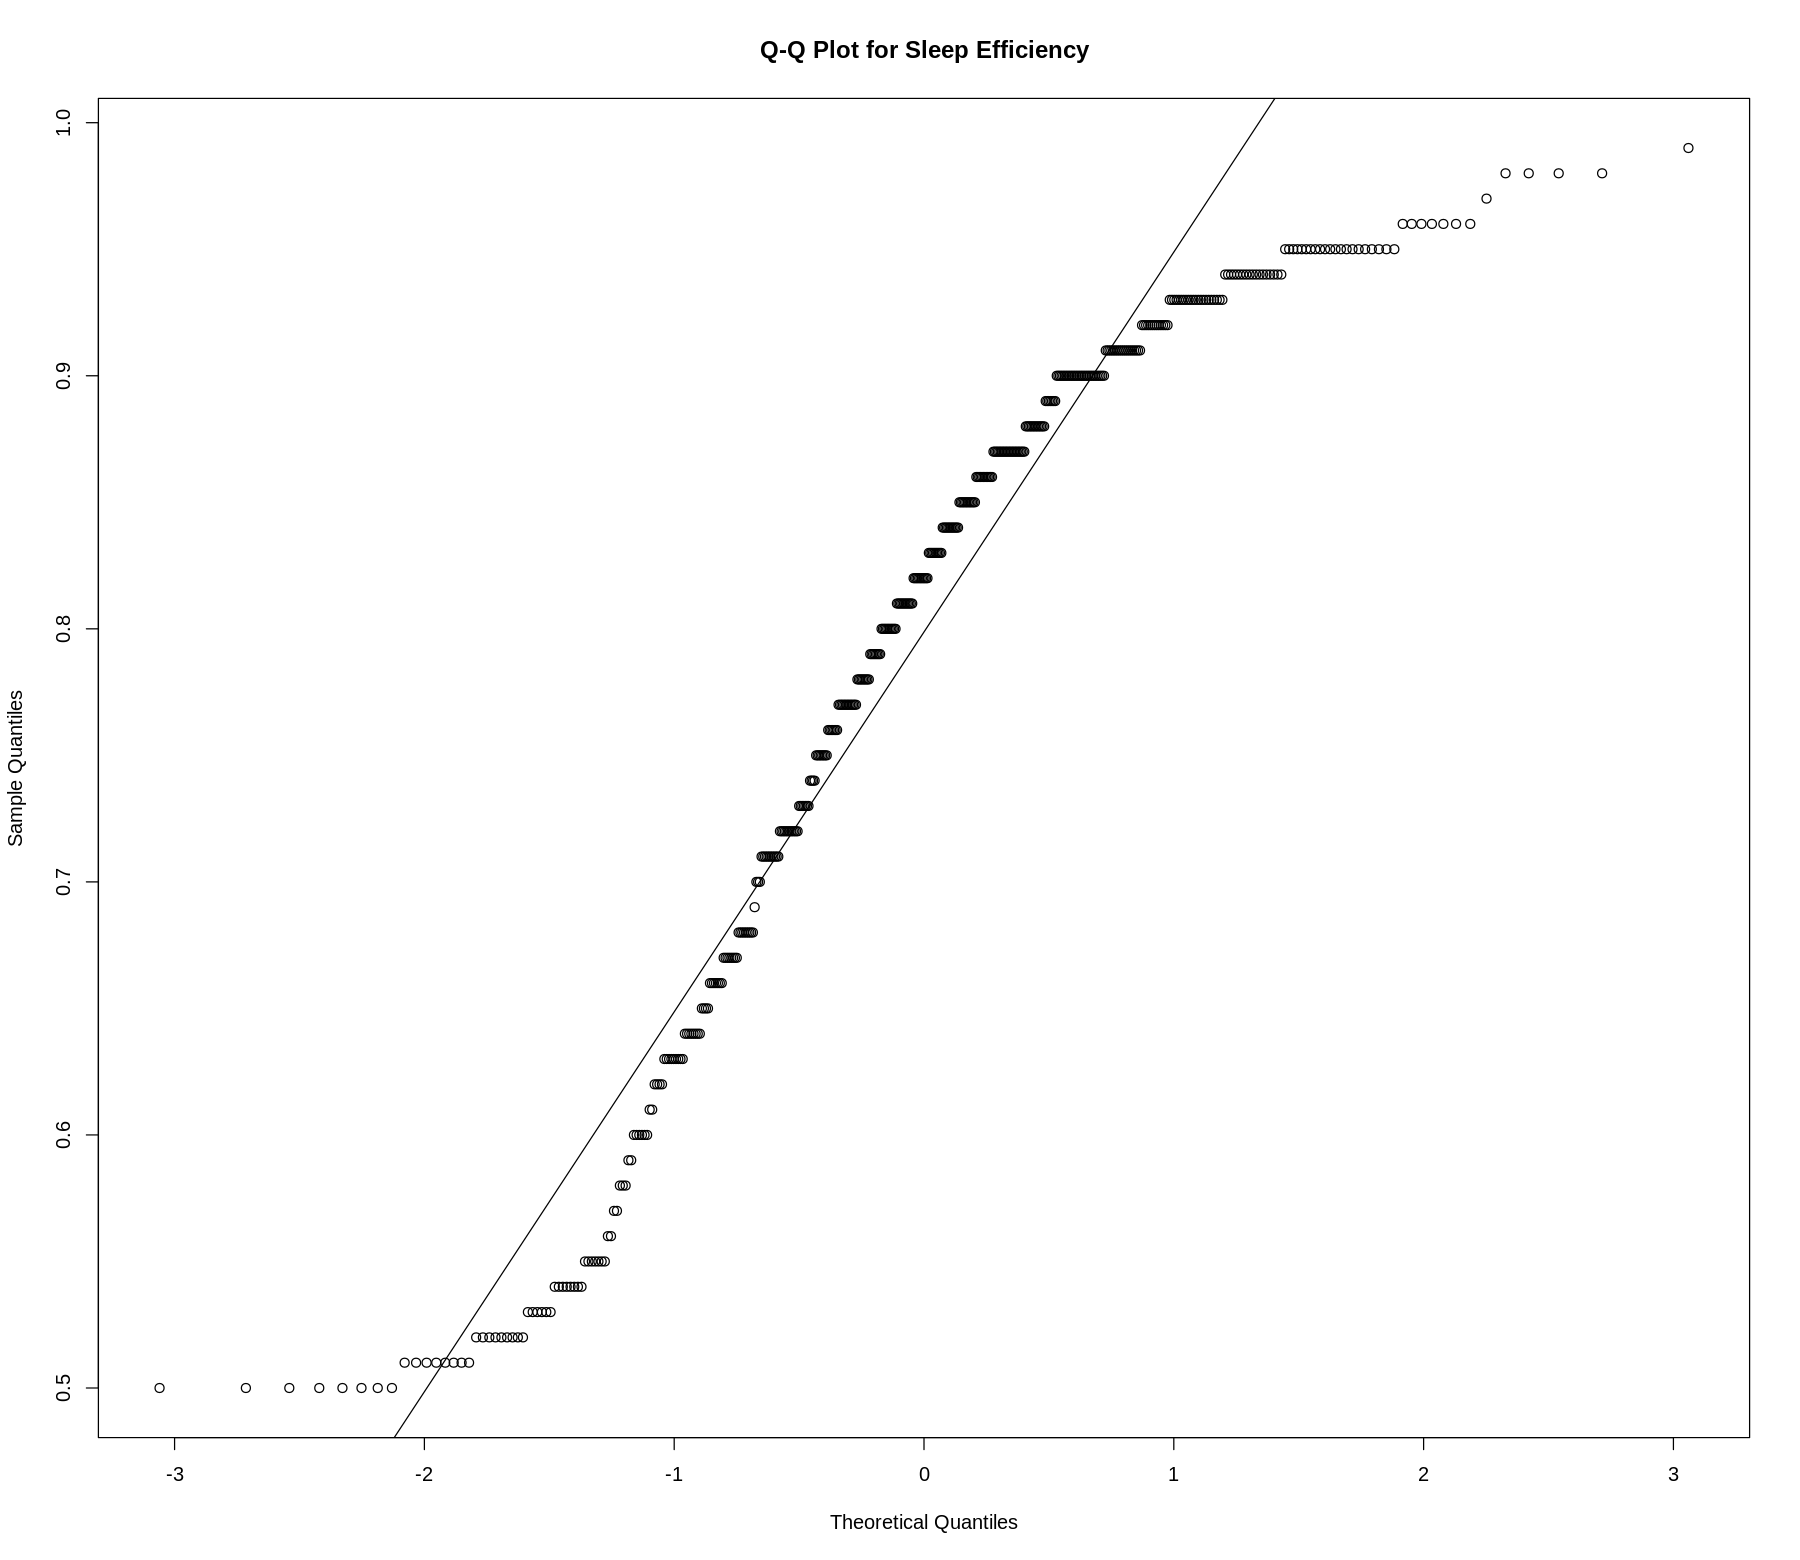

In [51]:
qqnorm(clean_data$SleepEfficiency, main = "Q-Q Plot for Sleep Efficiency")
qqline(clean_data$SleepEfficiency)

In [41]:
set.seed(333)

training_set <- sample_n(clean_data, size = nrow(clean_data) * 0.70,
  replace = FALSE
)

testing_set <- anti_join(clean_data,
  training_set
)

head(training_set)
nrow(training_set)

head(testing_set)
nrow(testing_set)

Joining with `by = join_by(SleepEfficiency, CeffeineConsumption,
AlcoholConsumption, SmokingStatus, ExerciseFrequency)`


,SleepEfficiency,CeffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,0.64,50,2,No,0
2,0.85,0,4,Yes,2
3,0.63,25,1,No,0
4,0.77,0,3,No,3
5,0.89,75,1,No,4
6,0.71,0,0,No,3


[1] 316

,SleepEfficiency,CeffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,0.79,50,0.000000,No,1
2,0.55,0,0.000000,No,0
3,0.92,50,0.000000,Yes,3
4,0.89,50,0.000000,Yes,3
5,0.83,0,1.173516,No,2
6,0.84,75,0.000000,No,2


[1] 104

In [42]:
model_selection <- regsubsets(
  x = SleepEfficiency ~ ., 
  nvmax = 3,
  data = training_set,
  method = "exhaustive"
)

selection_summary <- summary(model_selection)

selection_summary_dataframe <- tibble(
   n_input_variables = 1:3,
   RSS = selection_summary$rss,
   ADJ.R2 = selection_summary$adjr2,
)
selection_summary$which
selection_summary_dataframe

,(Intercept),CeffeineConsumption,AlcoholConsumption,SmokingStatusYes,ExerciseFrequency
1,TRUE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,TRUE
3,TRUE,FALSE,TRUE,TRUE,TRUE


n_input_variables,RSS,ADJ.R2
<int>,<dbl>,<dbl>
1,4.934950,0.1487804
2,4.601373,0.2037827
3,4.323872,0.2494031


In [43]:
generative_fit <- lm(SleepEfficiency ~ CeffeineConsumption+AlcoholConsumption+SmokingStatus+ExerciseFrequency,
                                    testing_set
                                )
glance(generative_fit) %>%
    select(r.squared, adj.r.squared)

r.squared,adj.r.squared
<dbl>,<dbl>
0.3261687,0.2989431


In [44]:
variables_vif <- vif(generative_fit)
round(variables_vif,3)

CeffeineConsumption  AlcoholConsumption       SmokingStatus   ExerciseFrequency 
              1.079               1.078               1.031               1.057

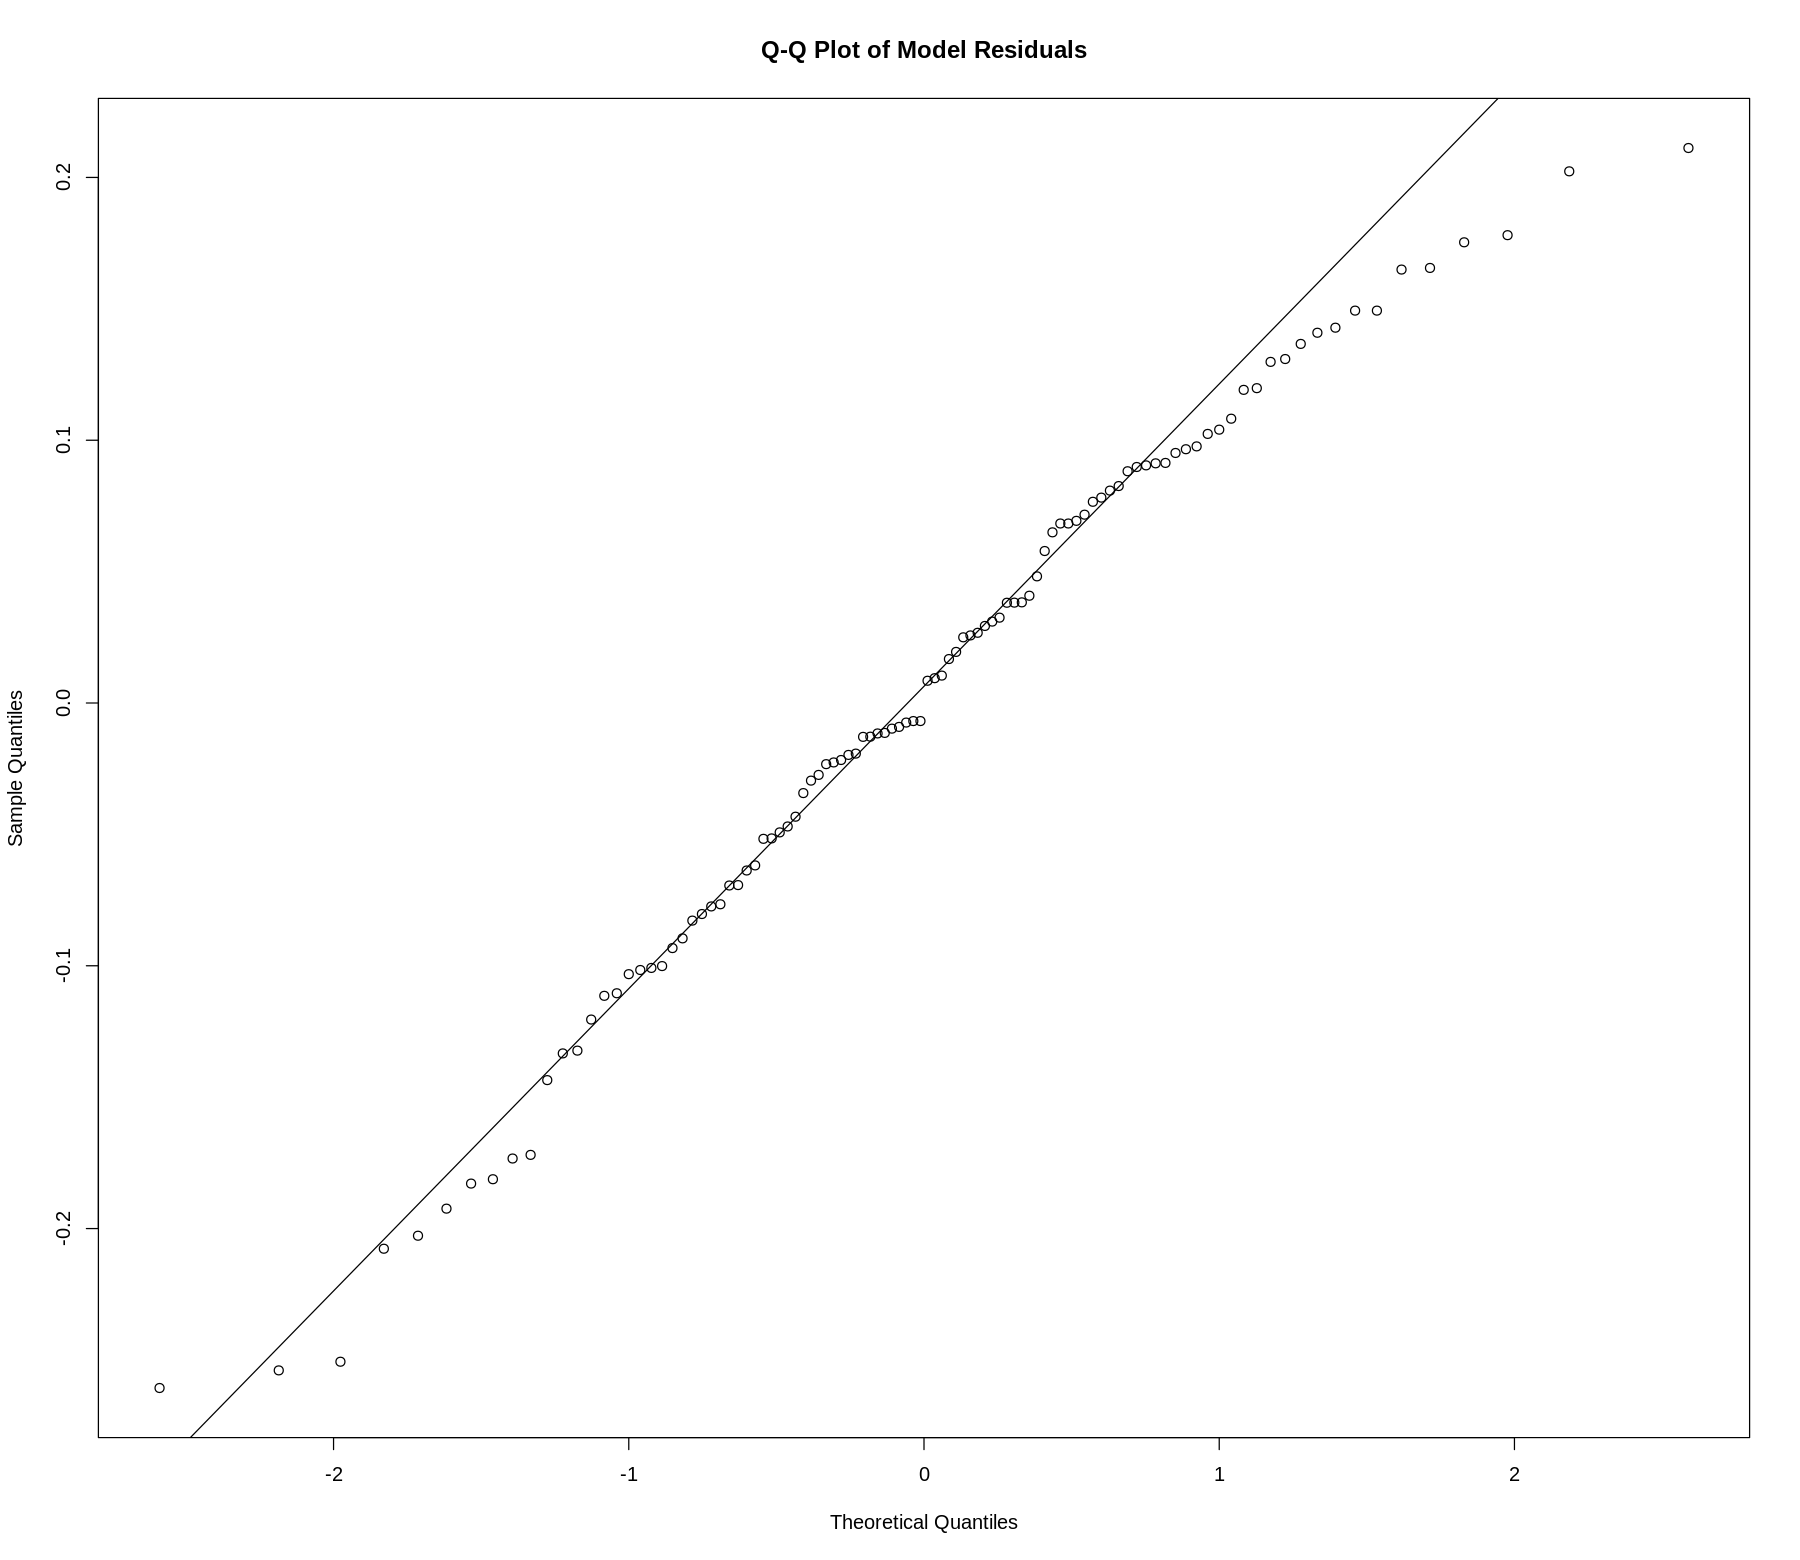

In [52]:
qqnorm(generative_fit$residuals, main = "Q-Q Plot of Model Residuals")
qqline(generative_fit$residuals)

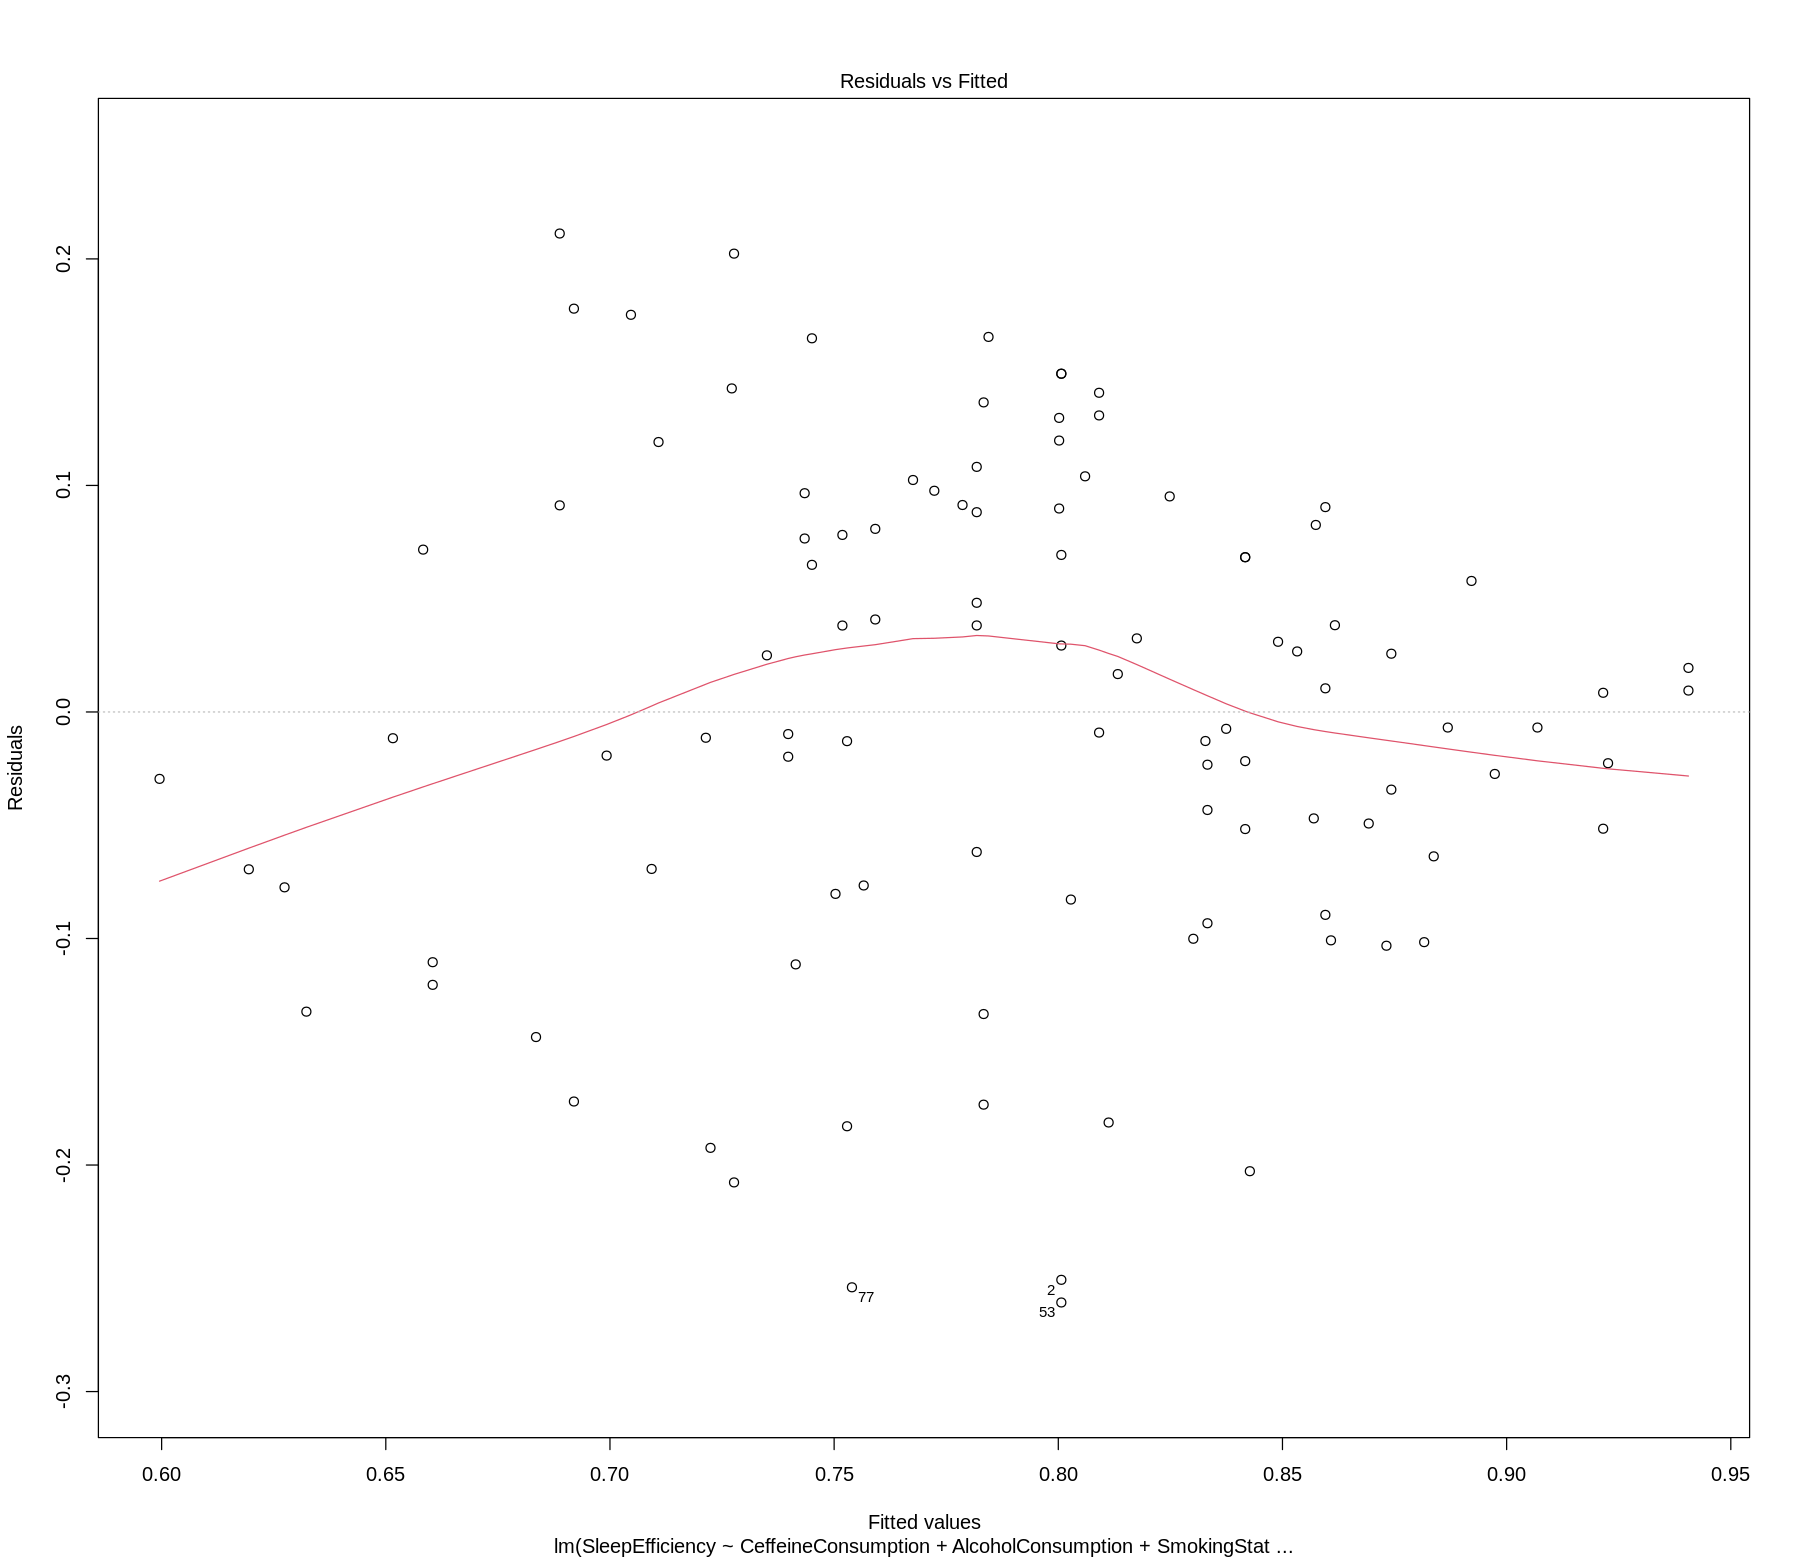

In [45]:
plot(generative_fit, 1)

In [46]:
interact_fit <- lm(SleepEfficiency ~ CeffeineConsumption+AlcoholConsumption*SmokingStatus+ExerciseFrequency,
                                    testing_set
                                )
glance(interact_fit) %>%
    select(r.squared, adj.r.squared)

r.squared,adj.r.squared
<dbl>,<dbl>
0.4006783,0.3701007


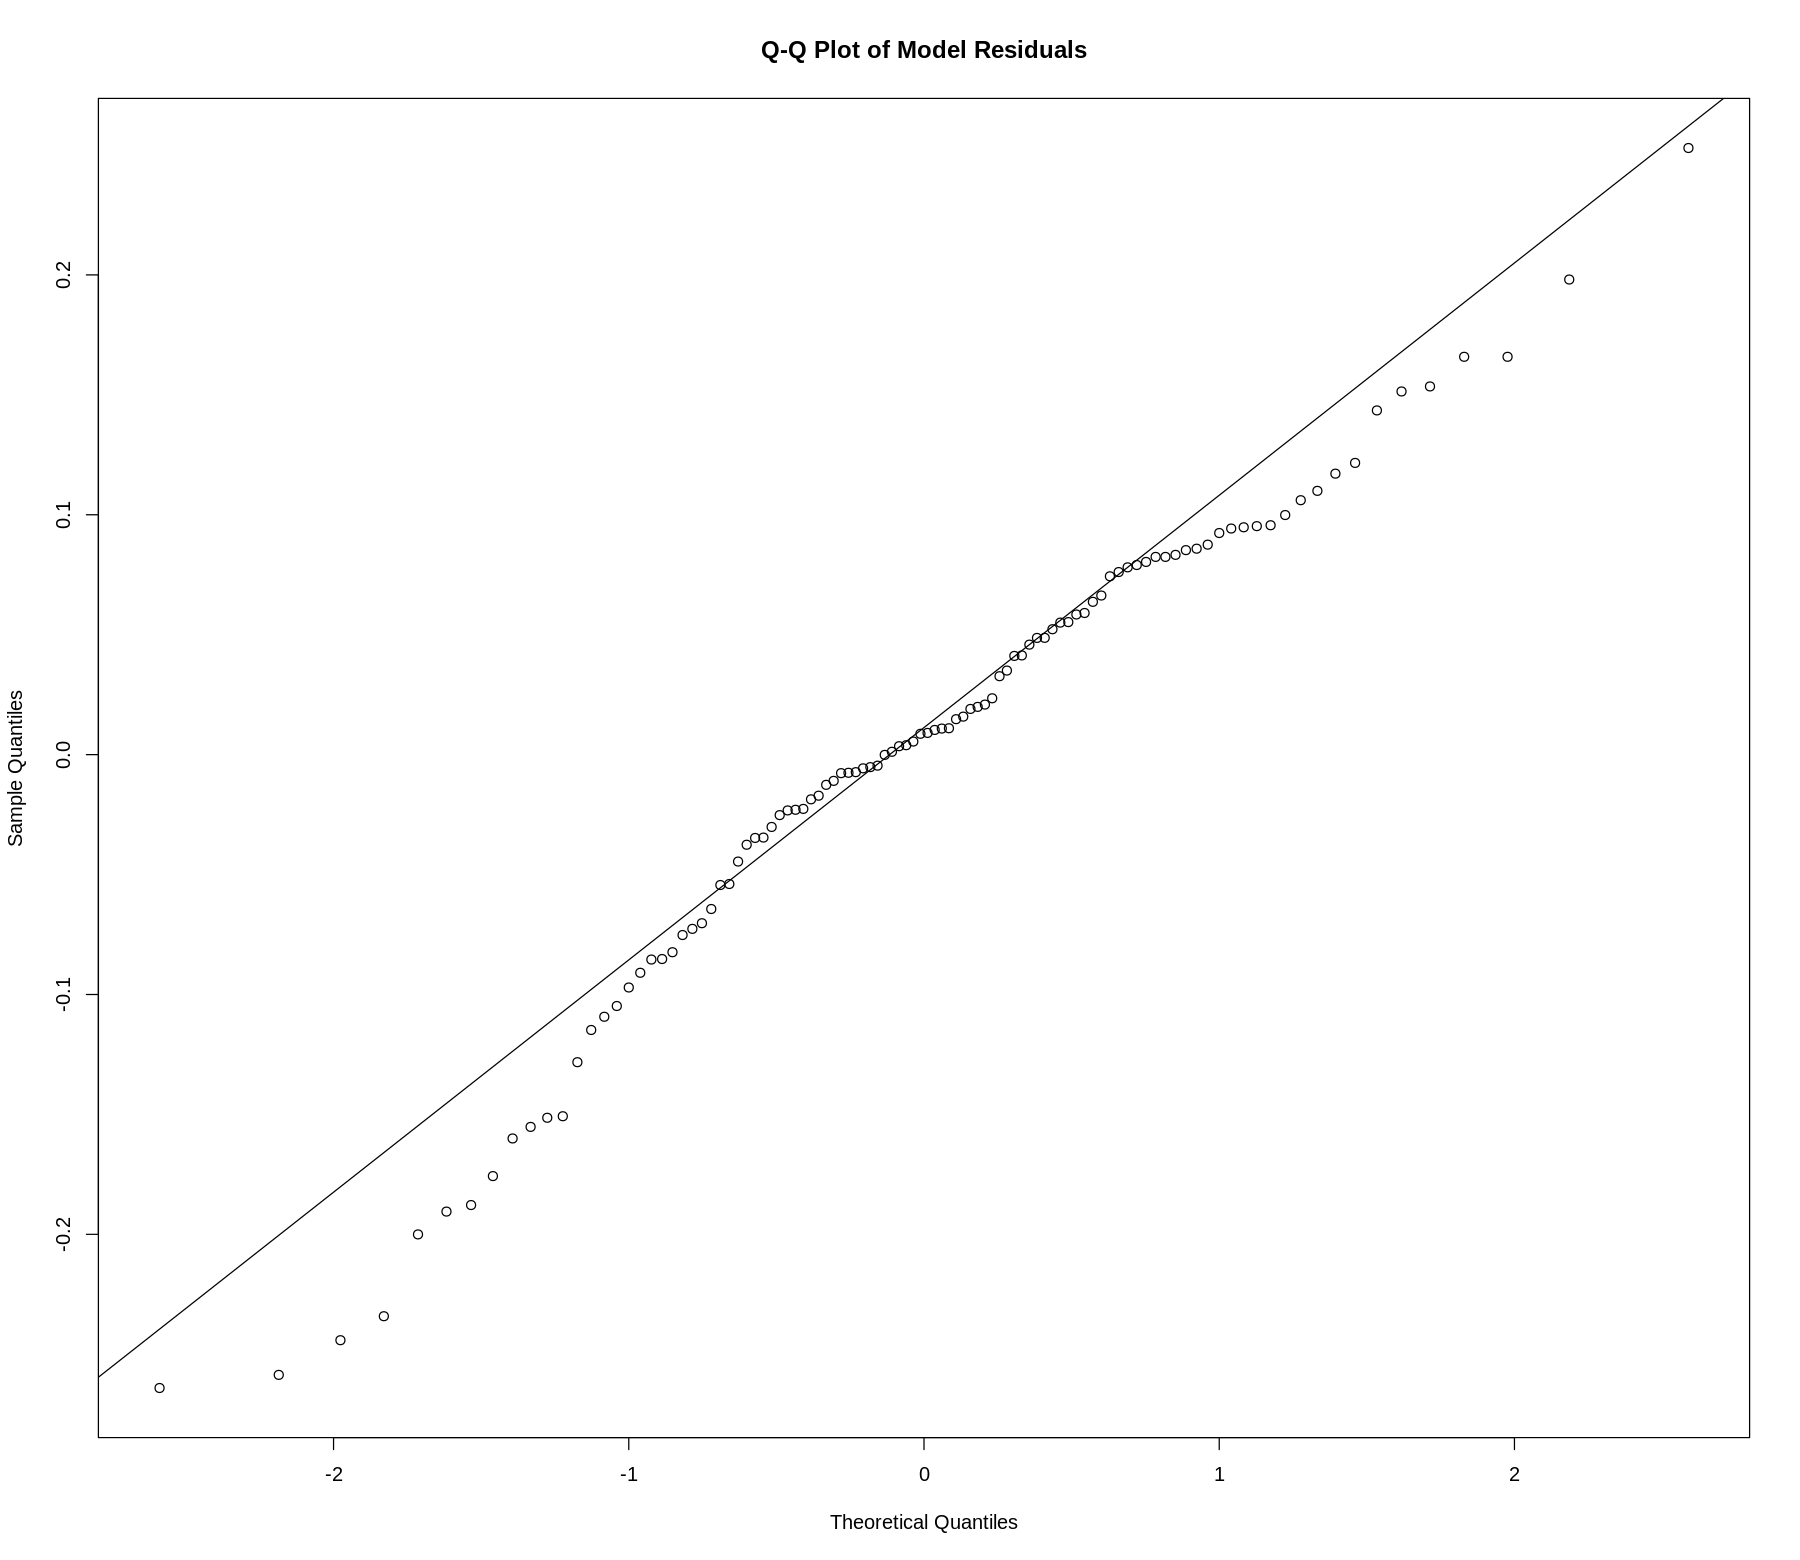

In [53]:
qqnorm(interact_fit$residuals, main = "Q-Q Plot of Model Residuals")
qqline(interact_fit$residuals)

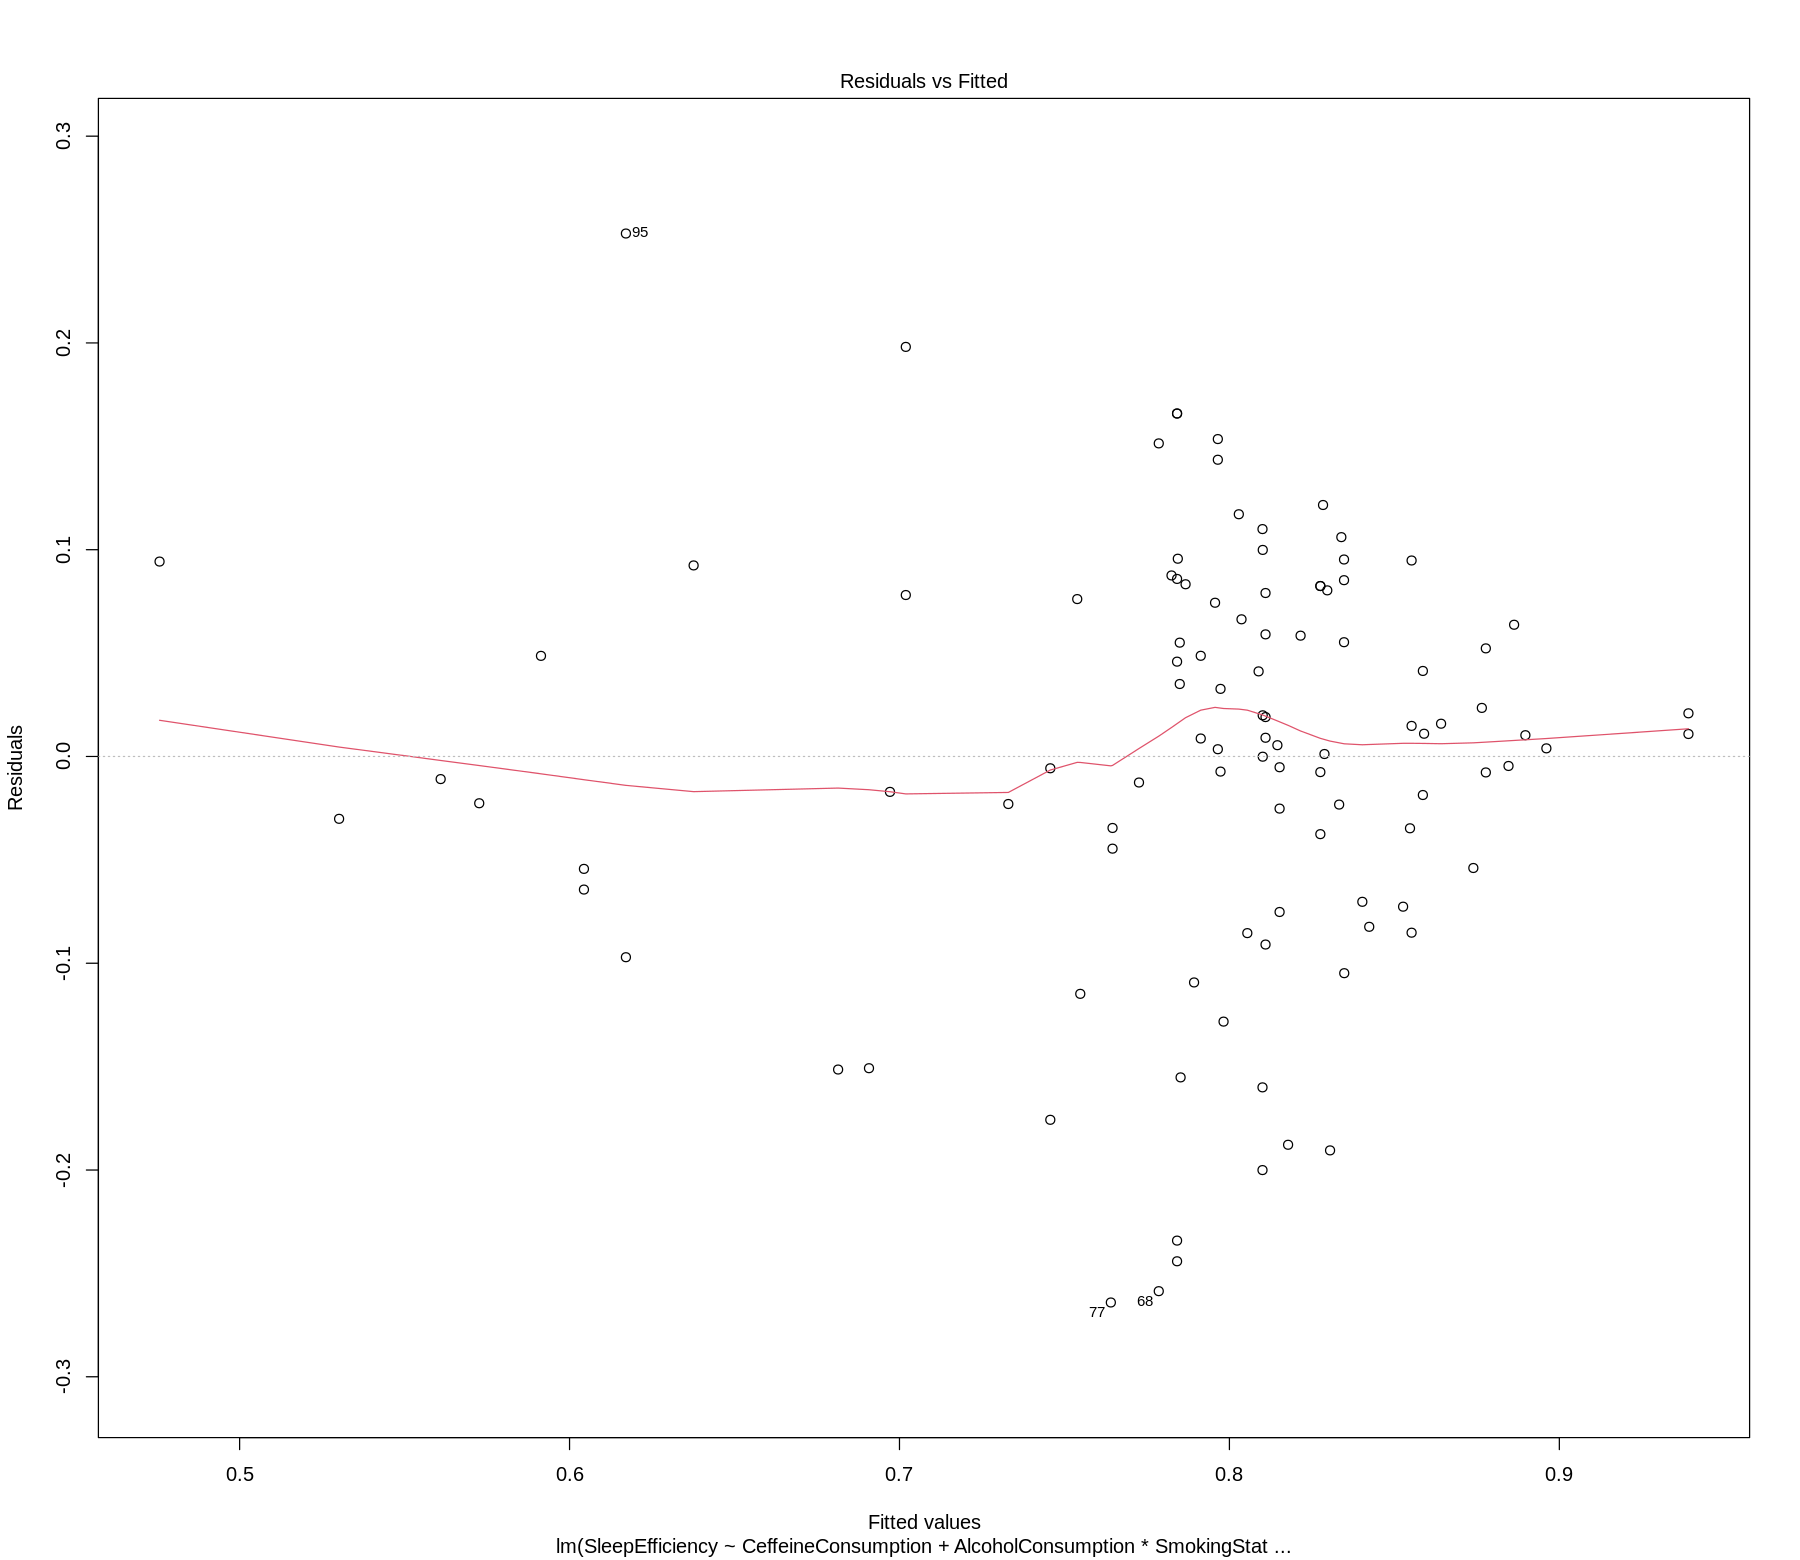

In [47]:
plot(interact_fit, 1)

In [48]:
anova(generative_fit,interact_fit)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,99,1.192468,NA,NA,NA,NA
2,98,1.060610,1,0.1318585,12.18368,0.0007242731


In [49]:
summary(interact_fit)


Call:
lm(formula = SleepEfficiency ~ CeffeineConsumption + AlcoholConsumption * 
    SmokingStatus + ExerciseFrequency, data = testing_set)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.264063 -0.054042  0.008871  0.076613  0.252915 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.7841365  0.0228558  34.308  < 2e-16 ***
CeffeineConsumption                  0.0004942  0.0003033   1.629 0.106418    
AlcoholConsumption                  -0.0097798  0.0095745  -1.021 0.309559    
SmokingStatusYes                    -0.0302595  0.0275605  -1.098 0.274925    
ExerciseFrequency                    0.0187169  0.0077123   2.427 0.017055 *  
AlcoholConsumption:SmokingStatusYes -0.0545343  0.0156236  -3.491 0.000724 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.104 on 98 degrees of freedom
Multiple R-squared:  0.4007,	Adjusted R-squared:  0.3